In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [4]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# Define the ANN model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    BatchNormalization(),  # Batch normalization layer
    Dropout(0.2),          # Dropout layer to prevent overfitting
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [8]:
# Train the model
history = model.fit(x_train_flat, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
375/375 [==============================] - 12s 25ms/step - loss: 0.2939 - accuracy: 0.9113 - val_loss: 0.1206 - val_accuracy: 0.9628
Epoch 2/50
375/375 [==============================] - 10s 28ms/step - loss: 0.1303 - accuracy: 0.9598 - val_loss: 0.1003 - val_accuracy: 0.9691
Epoch 3/50
375/375 [==============================] - 11s 31ms/step - loss: 0.0946 - accuracy: 0.9710 - val_loss: 0.0914 - val_accuracy: 0.9740
Epoch 4/50
375/375 [==============================] - 16s 43ms/step - loss: 0.0793 - accuracy: 0.9751 - val_loss: 0.0857 - val_accuracy: 0.9734
Epoch 5/50
375/375 [==============================] - 9s 24ms/step - loss: 0.0674 - accuracy: 0.9784 - val_loss: 0.0771 - val_accuracy: 0.9778
Epoch 6/50
375/375 [==============================] - 7s 20ms/step - loss: 0.0571 - accuracy: 0.9819 - val_loss: 0.0856 - val_accuracy: 0.9752
Epoch 7/50
375/375 [==============================] - 8s 21ms/step - loss: 0.0509 - accuracy: 0.9836 - val_loss: 0.0834 - val_accuracy: 0.

In [9]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0717 - accuracy: 0.9810
Test Accuracy: 0.9810000061988831


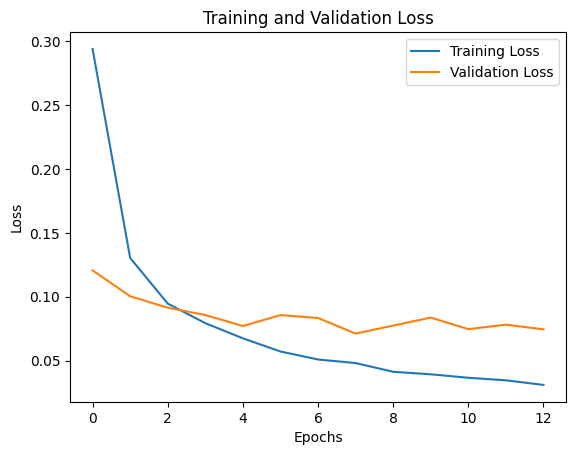

In [10]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

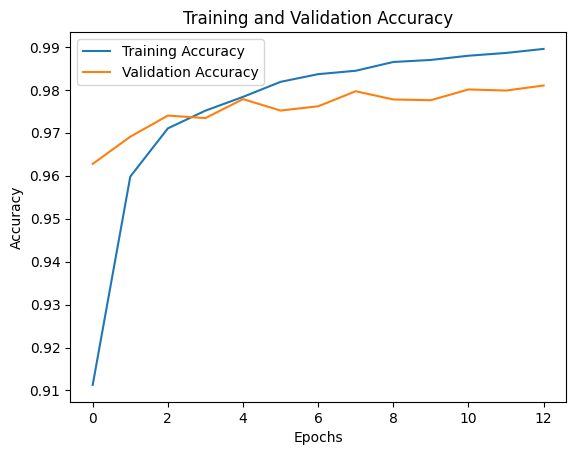

In [11]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step


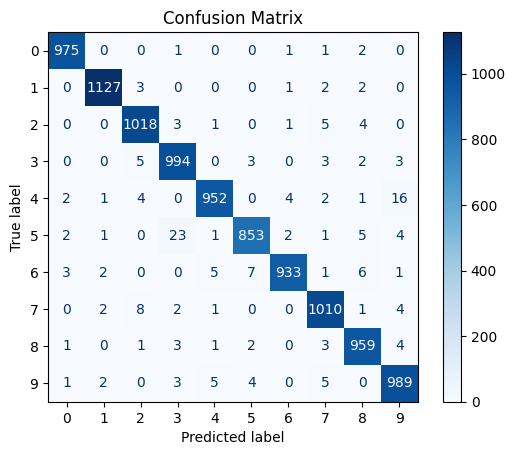

In [12]:
# Confusion matrix
y_pred = np.argmax(model.predict(x_test_flat), axis=-1)
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()